https://qiita.com/JMP_Japan/items/4a924c361206e2b862cd

In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

function pvalue_onesample_t_test(n, x̄, s², μ=0.0)
    z = (x̄ - μ) / √(s² / n)
    2ccdf(TDist(n - 1), abs(z))
end

function pvalue_onesample_t_test(x, μ=0.0)
    n, x̄, s² = length(x), mean(x), var(x)
    pvalue_onesample_t_test(n, x̄, s², μ)
end

function confint_onesample_t_test(n, x̄, s², α=0.05)
    c = cquantile(TDist(n - 1), α / 2)
    [x̄ - c * √(s² / n), x̄ + c * √(s² / n)]
end

function confint_onesample_t_test(x, α=0.05)
    n, x̄, s² = length(x), mean(x), var(x)
    confint_onesample_t_test(n, x̄, s², α)
end

confint_onesample_t_test (generic function with 4 methods)

x = [163.5, 177.8, 183.0, 172.7, 168.4, 175.5, 160.3, 180.2, 165.8, 174.6, 162.9, 177.4, 180.5, 169.8, 176.5]
sort(x) = [160.3, 162.9, 163.5, 165.8, 168.4, 169.8, 172.7, 174.6, 175.5, 176.5, 177.4, 177.8, 180.2, 180.5, 183.0]
quantile.((x,), (0.0, 0.25, 0.5, 0.75, 1.0)) = (160.3, 167.10000000000002, 174.6, 177.60000000000002, 183.0)
n = 15
x̄ = 172.59333333333333
s = 7.101052906502833
pvalue_onesample_t_test(x, μ) = 0.034509650745504696
confint_onesample_t_test(x) = [168.6609013080365, 176.52576535863017]


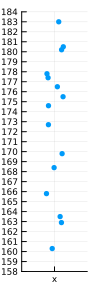

In [2]:
data = Any[
    1   163.5
    2   177.8
    3   183.0
    4   172.7
    5   168.4
    6   175.5
    7   160.3
    8   180.2
    9   165.8
    10  174.6
    11  162.9
    12  177.4
    13  180.5
    14  169.8
    15  176.5
]

x = oftype.(data[1, 2], data[:, 2])
@show x
@show sort(x)
@show quantile.((x,), (0.00, 0.25, 0.50, 0.75, 1.00))

μ = 168.3
n, x̄, s = length(x), mean(x), std(x)
@show n x̄ s
@show pvalue_onesample_t_test(x, μ)
@show confint_onesample_t_test(x)

dotplot(["x";;], [x;;]; label="", msc=:auto, ms=3)
plot!(xlim=(-0.5, 1.5), ylim=(158, 184))
plot!(ytick=150:200, tickfontsize=6)
plot!(size=(100, 300))

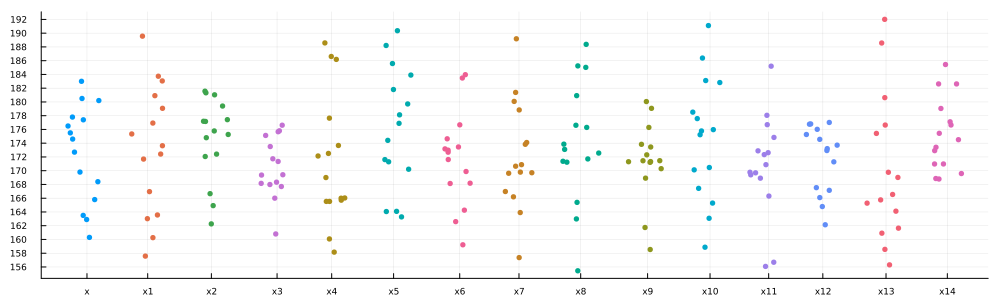

In [3]:
r = 14
X = rand(Normal(x̄, s), n, r)
xs = "x" .* string.((1:r)')
dotplot(["x" xs], [x X]; label="", msc=:auto, ms=3)
plot!(ytick=150:2:200, tickfontsize=6)
plot!(size=(1000, 300))